In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df = df.drop(["User ID", "Gender"], axis = 1)

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC(kernel = "rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\jaide\Anaconda3\envs\MLAI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


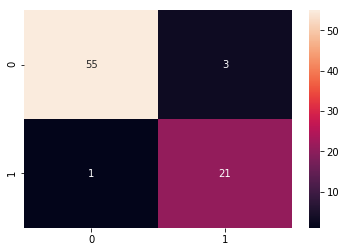

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [9]:
from sklearn.model_selection import cross_val_score

In [11]:
accuracies = cross_val_score(model, X_train, y_train, cv = 10)

C:\Users\jaide\Anaconda3\envs\MLAI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jaide\Anaconda3\envs\MLAI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jaide\Anaconda3\envs\MLAI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jaide\Anaconda3\envs\MLAI\lib\site-packa

In [12]:
accuracies

array([0.84848485, 0.875     , 0.90625   , 0.84375   , 0.90625   ,
       0.875     , 0.875     , 0.9375    , 1.        , 0.93548387])

In [13]:
accuracies.mean()

0.9002718719452589

In [15]:
accuracies.std()

0.04520576765296457

In [17]:
from matplotlib.colors import ListedColormap

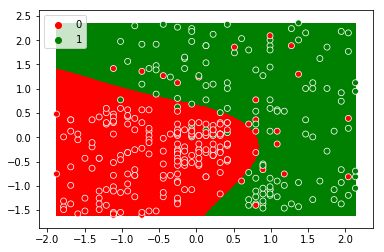

In [18]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            cmap = ListedColormap(["red", "green"]))
sns.scatterplot(X_set[:, 0], X_set[:, 1], palette = {1: "green", 0: "red"}, hue = y_set)

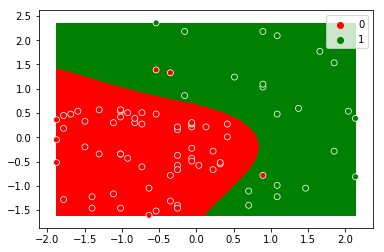

In [19]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            cmap = ListedColormap(["red", "green"]))
sns.scatterplot(X_set[:, 0], X_set[:, 1], palette = {1: "green", 0: "red"}, hue = y_set)